<img src="../Pics/MLSb-T.png" width="160">
<br><br>
<center><u><H1>Multilayer Perceptron</H1></u></center>

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
iris = load_iris()

In [3]:
X=iris.data[:,[0, 2]]
y=iris.target

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
sc = StandardScaler()

In [6]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [7]:
mlp = MLPClassifier(activation='logistic', solver='lbfgs',learning_rate_init=0.0001,
                    alpha=1e-5,hidden_layer_sizes=(100, 3), random_state=1)

In [8]:
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 3), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X_test_std, y_test, cv=5)

array([1.        , 0.88888889, 0.77777778, 1.        , 0.875     ])

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
mlp_pred = mlp.predict(X_test_std)
print(confusion_matrix(y_test,mlp_pred))

[[15  0  0]
 [ 0 14  0]
 [ 0  1 15]]


In [11]:
print(classification_report(y_test,mlp_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        45



## Plotting Decision Boundaries:

In [12]:
import Plotting_Decision_Boundaries as pdb

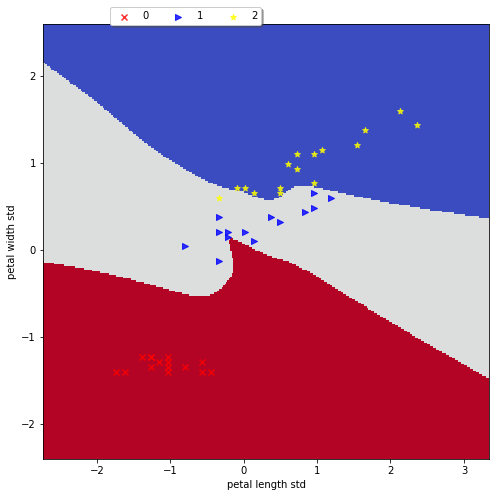

In [13]:
pdb.plot_regions(X=X_test_std,y=y_test,classifier=mlp)

## Reference:
http://scikit-learn.org/stable/modules/neural_networks_supervised.html

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor